In [ ]:
import xarray as xr    # handles netcdf data
import numpy as np     # numerical functions etc
import pandas as pd    # dataframes
import matplotlib      # plotting functions
import matplotlib.pyplot as plt    # specific plotting function I use a lot   
from matplotlib.patches import Rectangle     # specific plotting function with an annoyingly long name
import matplotlib.gridspec as gridspec #to define the sizes of plots specifically
import geopandas as gpd    # shapefiles
import cartopy     # plotting geographical features
import regionmask    # convert shapefile to binary 0,1 mask
import re     # regular expressions (replace substrings etc)
from geopy.geocoders import Nominatim    # get lat & lon coordinates from a place name

#for climate indices
import xclim.indices as xc_i
import xclim as xc
from xclim.indices.stats import fit

#For plotting
import matplotlib.ticker as plticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import nc_time_axis #to plot cf.time axis
import cftime #to plot cf.time axis

#For Statistics
import scipy.stats as stats
from scipy import optimize
from scipy.stats import norm, gamma
import lmoments3.distr                     # conda activate xclim; pip install git+https://github.com/OpenHydrology/lmoments3.git
glo = getattr(lmoments3.distr, "glo")

#For copulas
import sklarpy.univariate as sk_uni
from sklarpy.copulas import gh_copula
from sklarpy.multivariate import mvt_normal
from sklarpy.copulas import MarginalFitter
from sklarpy.univariate import UnivariateFitter
from sklarpy import print_full
from sklarpy.copulas import gumbel_copula
from sklarpy.copulas import frank_copula
from sklarpy.copulas import clayton_copula

#For handling errors
import sys
import warnings

### Picture for Run Theory

In [3]:
len(time[1:])

9

In [4]:
len(spei[:-1])
def gapfill(bool_array):
    normal = list(bool_array)
    shifted = [False] + normal[:-1]
    return np.array([x or shifted[n] for n, x in enumerate(normal)])

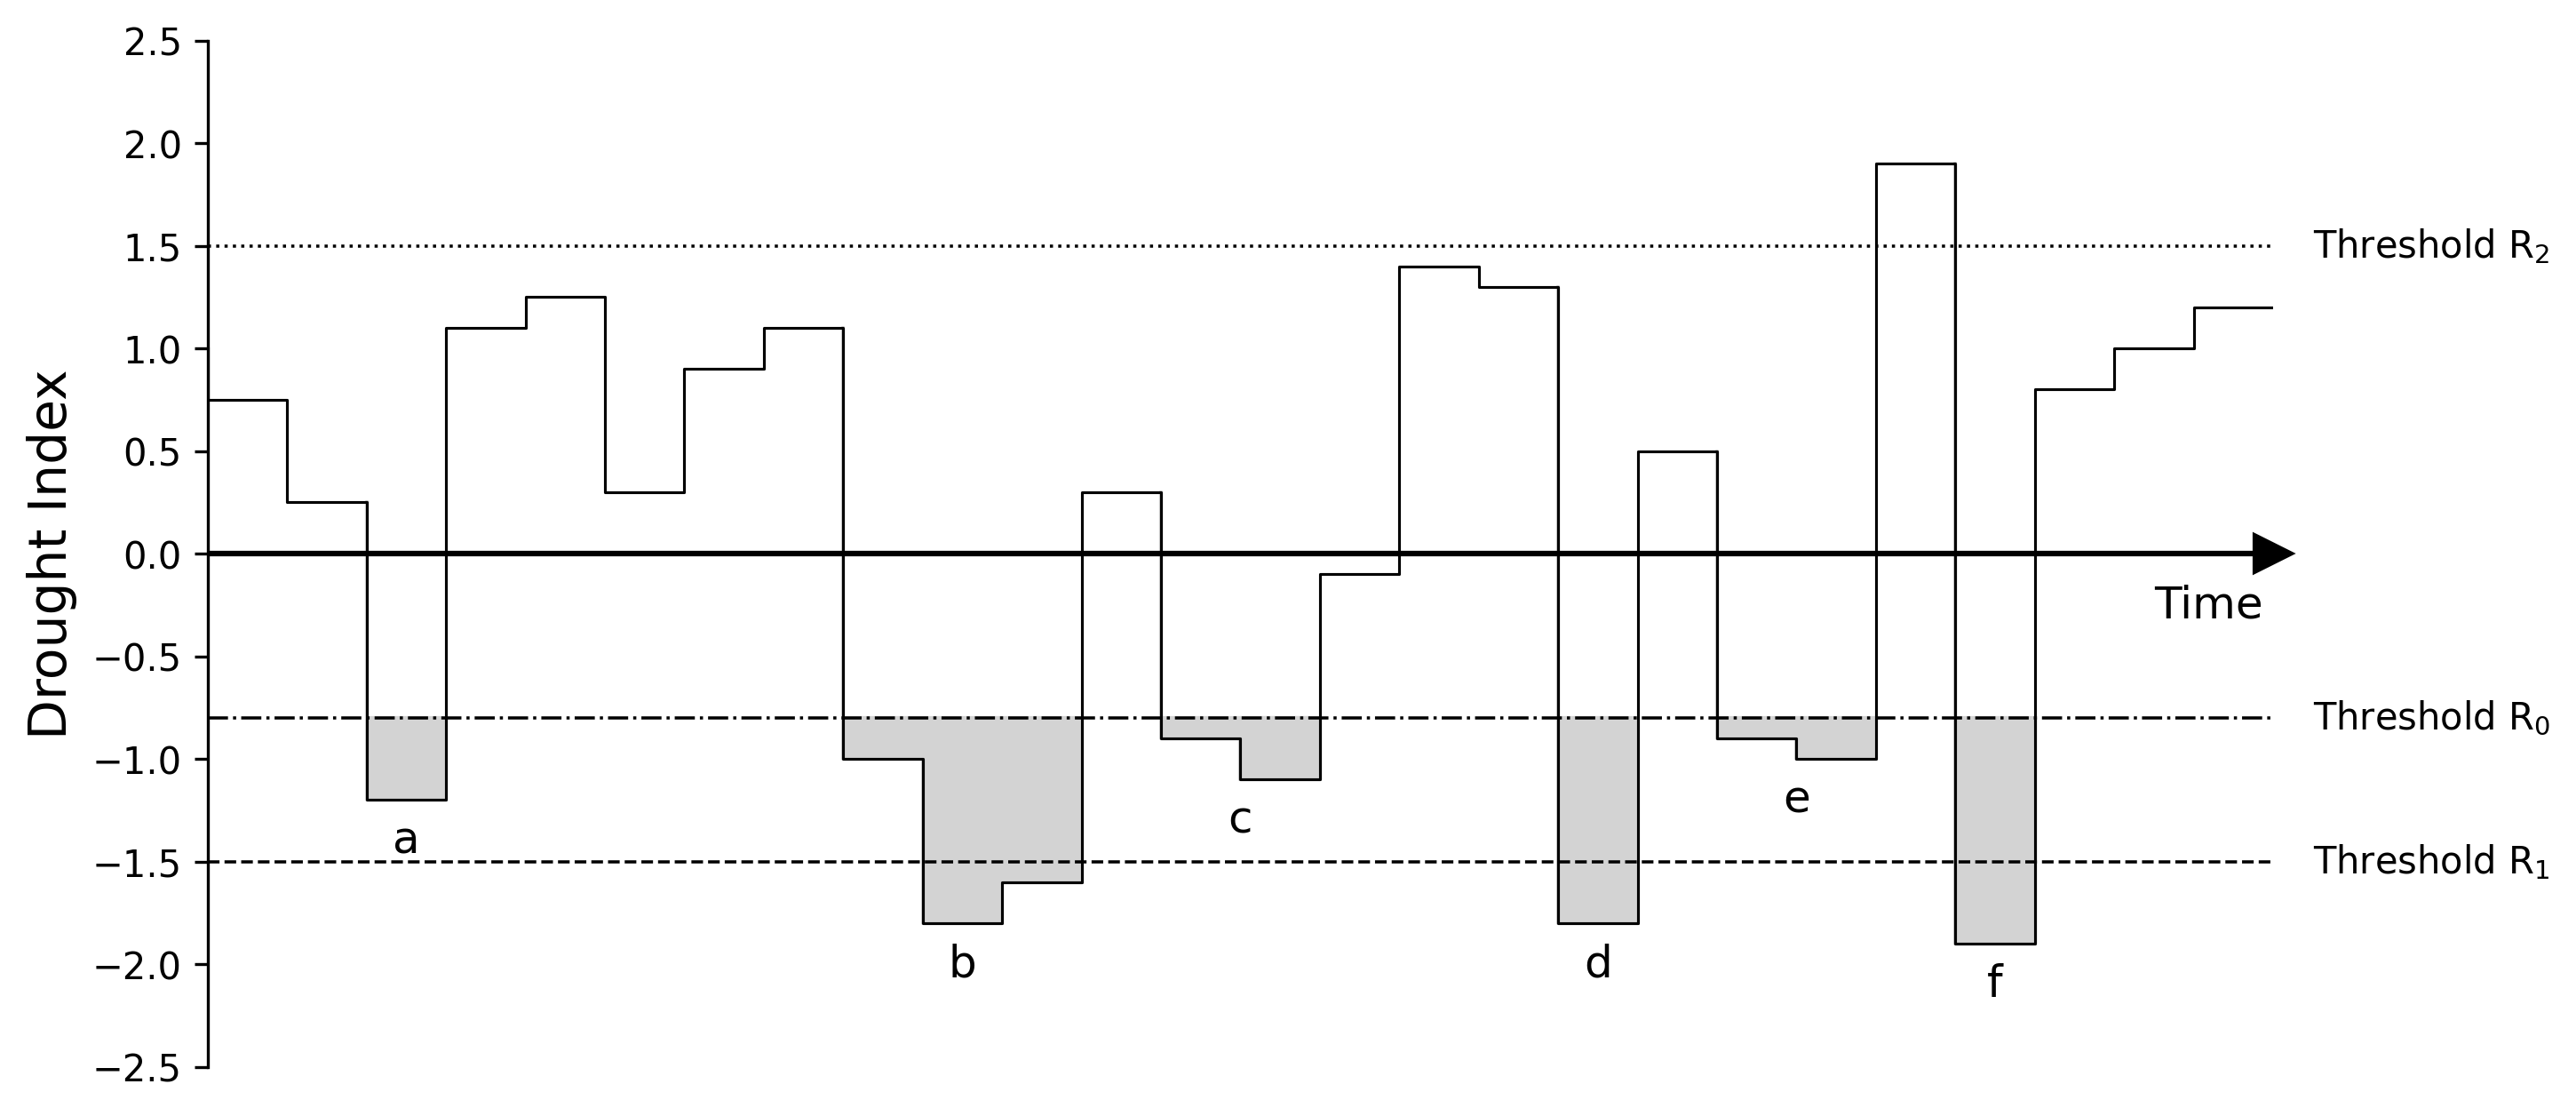

<Figure size 640x480 with 0 Axes>

In [5]:
# Example data
time = np.arange(0, 27)
spei = np.array([1, 0.75, 0.25, -1.2, 1.1, 1.25, 0.3, 0.9, 1.1, -1.0, 
                 -1.8, -1.6, 0.3, -0.9, -1.1, -0.1, 1.4, 1.3, -1.8, 0.5,
                -.9, -1, 1.9, -1.9, 0.8, 1, 1.2])
spei_2 = np.array([1, 0.75, -1.2, -1.2, 1.1, 1.25, 1.3, 0.9, -1.1, -1.0, 
                 -1.3, -1.8, 0.3, -0.9, -1.1, 0.1, 1.4, -1.3, -1.8, 0.5,
                1., .9, -1.9, -1.9, 0.8, 1, 1.2])
spei_3 = np.array([1, 0.75, 0.25, -1.2, 1.1, 1.25, 1.3, 0.9, 1.1, 1.0, 
                 1.3, 1.6, -0.9, -0.9, -1.1, -0.1, 1.4, 1.3, 1.8, -0.9,
                -.9, -1, 1.9, -1.9, 0.8, 1, 1.2])

# Thresholds
R0 = 1.5
R1 = -0.8
R2 = -1.5

spei_lower_R1 = spei_2<=R1
spei_lower_R1_1 = spei_3<=R1
#print(spei_lower_R1)
#spei_lower_R1 = spei_M12_historic_CutCAS<=0


fig, ax = plt.subplots(figsize=(10,5),dpi = 300)

ax.step(time,spei,color='black',linewidth=0.75)
ax.fill_between(time,R1,spei,where=spei_lower_R1,interpolate=False,color='lightgrey',step='pre')
ax.fill_between(time,R1,spei,where=spei_lower_R1_1,interpolate=False,color='lightgrey',step='pre')

ax.set_xlim(0, 26)
ax.set_ylim(-2.5,2.5)

ax.axhline(y=R0, color='black', linestyle=':',linewidth=0.85)
ax.axhline(y=R1, color='black', linestyle='-.',linewidth=0.85)
ax.axhline(y=R2, color='black', linestyle='--',linewidth=0.85)
ax.axhline(y=0, color='black')


annotations = ['a','b', 'd', 'f']
annotate_positions = [3, 10, 18, 23]
for i, pos in enumerate(annotate_positions):
    ax.text(time[pos]-0.5, spei[pos] - 0.3 if spei[pos] < 0 else spei[pos] + 0.3, annotations[i], 
            ha='center', va='bottom' if spei[pos] < 0 else 'top', fontsize=12)
    
annotations = ['c', 'e',]
annotate_positions = [14, 21]
for i, pos in enumerate(annotate_positions):
    ax.text(time[pos]-1, spei[pos] - 0.3 if spei[pos] < 0 else spei[pos] + 0.3, annotations[i], 
            ha='center', va='bottom' if spei[pos] < 0 else 'top', fontsize=12)

# Adding threshold labels
ax.text(time[-1] + 0.5, R0, f'Threshold R$_2$', ha='left', va='center', fontsize=10)
ax.text(time[-1] + 0.5, R1, f'Threshold R$_0$', ha='left', va='center', fontsize=10)
ax.text(time[-1] + 0.5, R2, f'Threshold R$_1$', ha='left', va='center', fontsize=10)

#label
ax.text(time[-1] -1.5, -0.25, 'Time', ha='left', va='center', fontsize=12)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)

ax.yaxis.set_major_locator(MultipleLocator(.5))# defines setting of the small ticks
#legend = plt.legend(loc="lower right",fontsize='12')
#legend.get_frame().set_alpha(0.5)
#legend.get_frame().set_alpha(None)
ax.set_xlabel(r'Drought Index',fontsize='14')
ax.set_ylabel(r'Drought Index',fontsize='14')
ax.tick_params(axis='both', which='major', labelsize='10')
ax.get_xaxis().set_visible(False)
ax.spines[['top', 'bottom', 'right']].set_visible(False)
plt.show()
plt.savefig('images/RunTheory.png')

### For overview

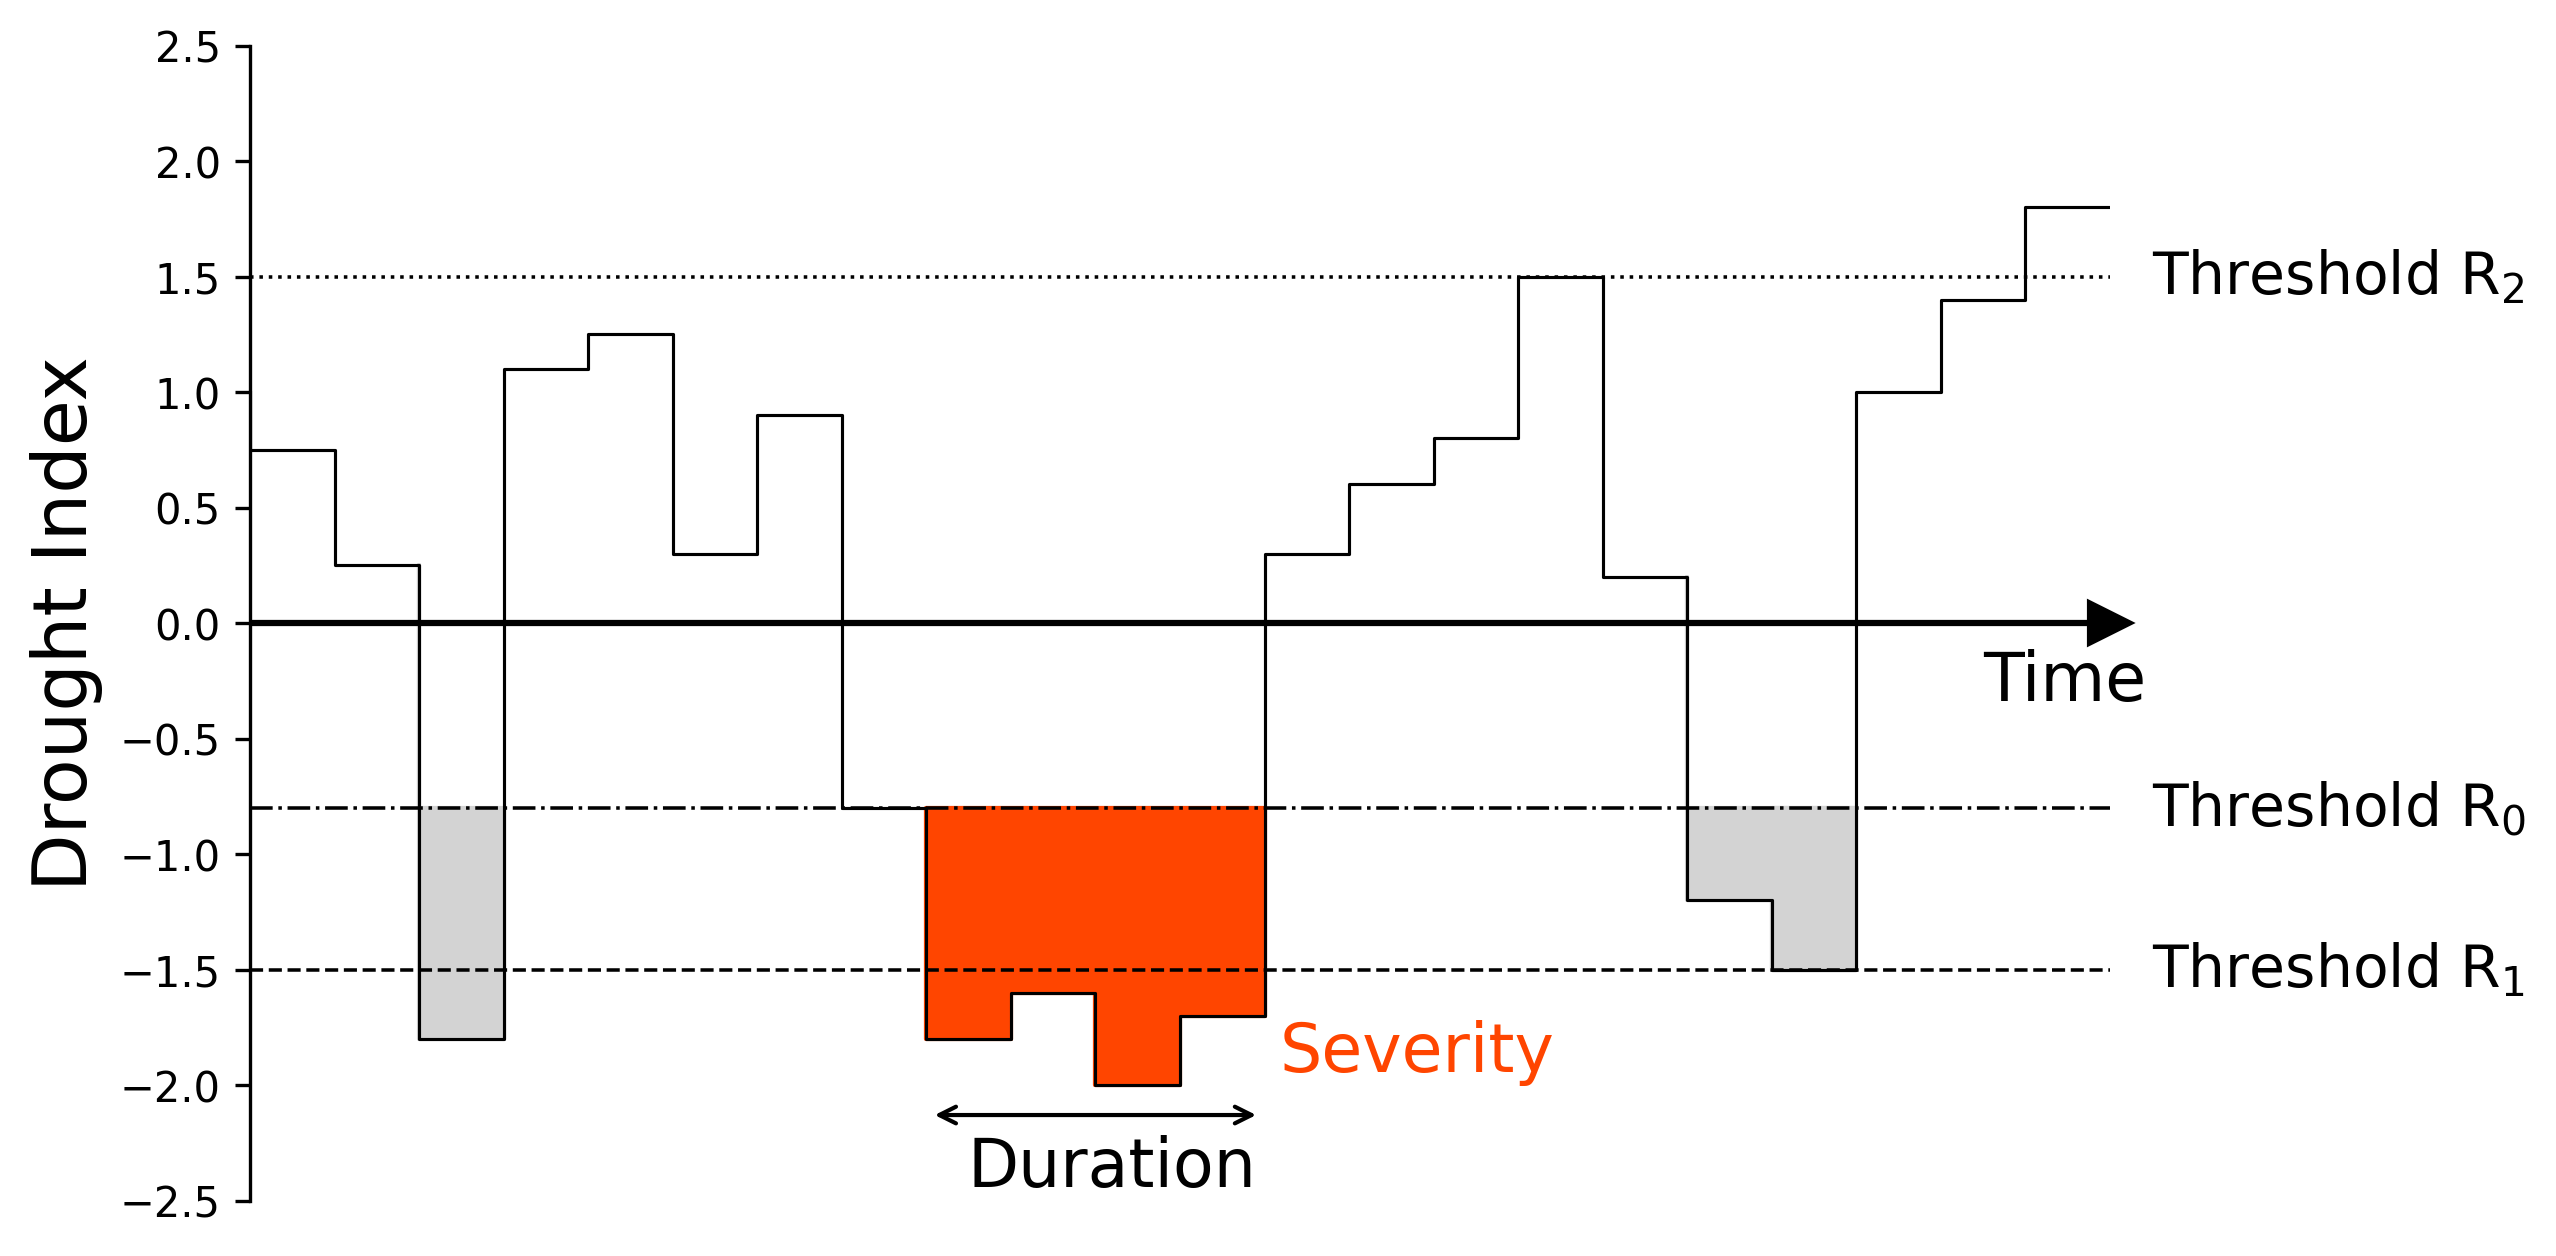

<Figure size 640x480 with 0 Axes>

In [65]:
# Example data

spei = np.array([1, 0.75, 0.25, -1.8, 1.1, 1.25, 0.3, 0.9, -0.8, 
                 -1.8, -1.6,-2,-1.7, 0.3,0.6,0.8,1.5,0.2,-1.2,-1.5,1.0,1.4,1.8])
spei_2 = np.array([1, 0.75, -1.2, -1.8, 1.1, 1.25, 1.3, 0.9, -1.0, 
                 -1.3, -1.8,-2,-1.7, 0.3,0.6,0.8,1.5,-1.2,-1.2,-1.5,1.0,1.4,1.8])
spei_3 = np.array([1, 0.75, 0.25, -1.8, 1.1, 1.25, 1.3, 0.9, 1.0, 
                 1.3, 1.6,1.8,1.8, 1.9,0.6,0.8,1.5,1.2,-1.2,-1.5,1.0,1.4,1.8])
time = np.arange(0, len(spei))

# Thresholds
R0 = 1.5
R1 = -0.8
R2 = -1.5

spei_lower_R1 = spei_2<=R1
spei_lower_R1_1 = spei_3<=R1

spei_lower_R3 = spei_2[5:15]<=R1


fig, ax = plt.subplots(figsize=(8,5),dpi = 300)

ax.step(time,spei,color='black',linewidth=0.75)
ax.fill_between(time,R1,spei,where=spei_lower_R1,interpolate=False,color='lightgrey',step='pre')
ax.fill_between(time,R1,spei,where=spei_lower_R1_1,interpolate=False,color='lightgrey',step='pre')
ax.fill_between(time[5:15],R1,spei[5:15],where=spei_lower_R3,interpolate=False,color='orangered',step='pre')

ax.text(13.8, -2, "Severity", ha='center', va='bottom', fontsize=16,color='orangered')
ax.annotate('', xy=(8, -2.13), xytext=(12, -2.13), arrowprops=dict(arrowstyle='<->', color='black'))
ax.text(10.2, -2.5, "Duration", ha='center', va='bottom', fontsize=16,color='black')

ax.set_xlim(0, len(spei)-1)
ax.set_ylim(-2.5,2.5)

ax.axhline(y=R0, color='black', linestyle=':',linewidth=0.85)
ax.axhline(y=R1, color='black', linestyle='-.',linewidth=0.85)
ax.axhline(y=R2, color='black', linestyle='--',linewidth=0.85)
ax.axhline(y=0, color='black')

# Adding threshold labels
ax.text(time[-1] + 0.5, R0, f'Threshold R$_2$', ha='left', va='center', fontsize=14)
ax.text(time[-1] + 0.5, R1, f'Threshold R$_0$', ha='left', va='center', fontsize=14)
ax.text(time[-1] + 0.5, R2, f'Threshold R$_1$', ha='left', va='center', fontsize=14)

#label
ax.text(time[-1] -1.5, -0.25, 'Time', ha='left', va='center', fontsize=16)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)

ax.yaxis.set_major_locator(MultipleLocator(.5))# defines setting of the small ticks
#legend = plt.legend(loc="lower right",fontsize='12')
#legend.get_frame().set_alpha(0.5)
#legend.get_frame().set_alpha(None)
ax.set_xlabel(r'Drought Index',fontsize='18')
ax.set_ylabel(r'Drought Index',fontsize='18')
ax.tick_params(axis='both', which='major', labelsize='10')
ax.get_xaxis().set_visible(False)
ax.spines[['top', 'bottom', 'right']].set_visible(False)
plt.show()
plt.savefig('images/RunTheory.png')

### Gauss Curve for SPI Values

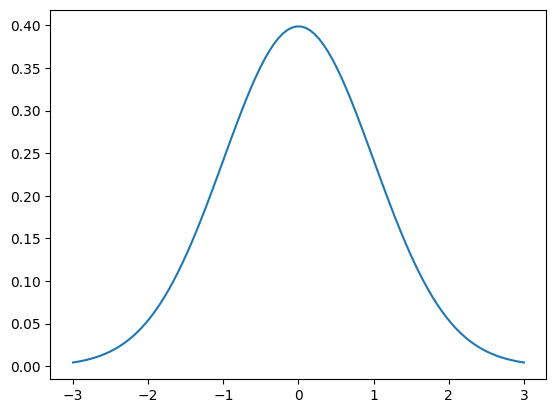

In [6]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

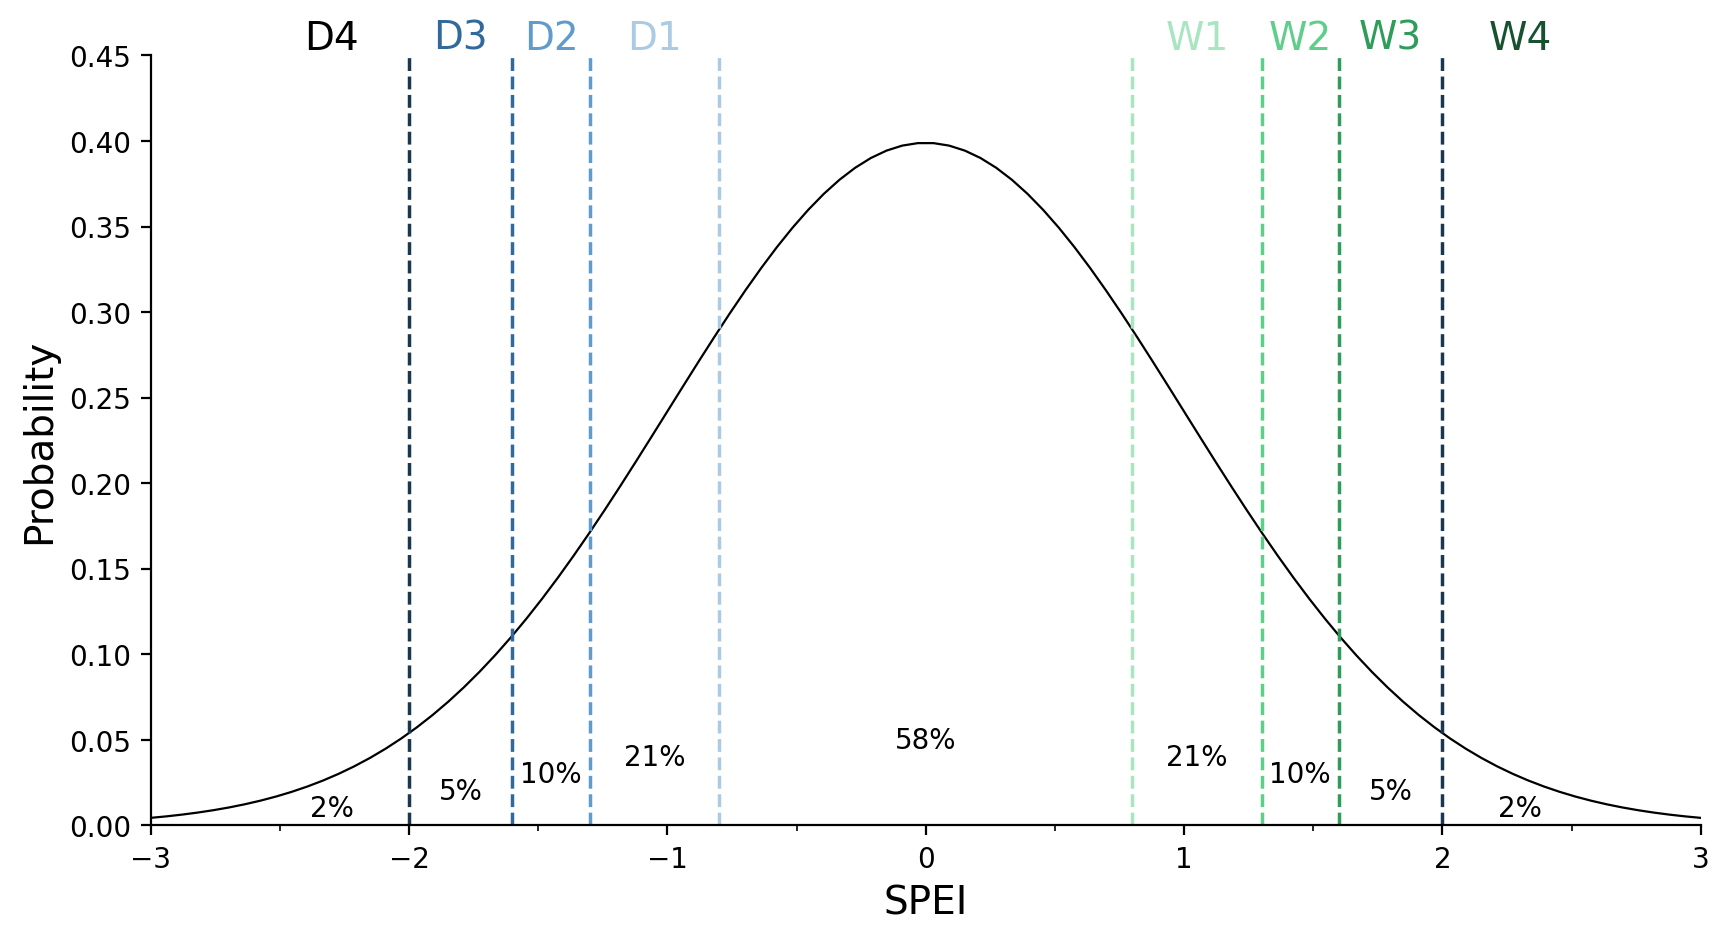

In [7]:
fig, ax = plt.subplots(figsize=(10,5),dpi = 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma),c='black',linewidth=0.8)

ax.axvline(x=-0.8, color='#abcae4', linestyle='--',linewidth=1.25)
ax.axvline(x=-1.3, color='#619bcc', linestyle='--',linewidth=1.25)
ax.axvline(x=-1.6, color='#316a9a', linestyle='--',linewidth=1.25)
ax.axvline(x=-2.0, color='#193750', linestyle='--',linewidth=1.25)
ax.text((-0.8-1.3)/2,0.46, 'D1', color='#abcae4',ha='center', va='center', fontsize=14)
ax.text((-1.6-1.3)/2,0.46, 'D2', color='#619bcc',ha='center', va='center', fontsize=14)
ax.text((-1.6-2.0)/2,0.46, 'D3', color='#316a9a',ha='center', va='center', fontsize=14)
ax.text(-2.3,0.46, 'D4', color='black',ha='center', va='center', fontsize=14)
ax.text((-0.8-1.3)/2,0.04, f'21%', color='black',ha='center', va='center', fontsize=10)
ax.text((-1.6-1.3)/2,0.03, f'10%', color='black',ha='center', va='center', fontsize=10)
ax.text((-1.6-2.0)/2,0.02, f'5%', color='black',ha='center', va='center', fontsize=10)
ax.text(-2.3,0.01, f'2%', color='black',ha='center', va='center', fontsize=10)

ax.axvline(x=0.8, color='#aae5c1', linestyle='--',linewidth=1.25)
ax.axvline(x=1.3, color='#5fce8b', linestyle='--',linewidth=1.25)
ax.axvline(x=1.6, color='#2f9c5a', linestyle='--',linewidth=1.25)
ax.axvline(x=2.0, color='#193750', linestyle='--',linewidth=1.25)
ax.text((0.8+1.3)/2,0.46, 'W1', color='#aae5c1',ha='center', va='center', fontsize=14)
ax.text((1.6+1.3)/2,0.46, 'W2', color='#5fce8b',ha='center', va='center', fontsize=14)
ax.text((1.6+2.0)/2,0.46, 'W3', color='#2f9c5a',ha='center', va='center', fontsize=14)
ax.text(+2.3,0.46, 'W4', color='#18512f',ha='center', va='center', fontsize=14)
ax.text((0.8+1.3)/2,0.04, f'21%', color='black',ha='center', va='center', fontsize=10)
ax.text((1.6+1.3)/2,0.03, f'10%', color='black',ha='center', va='center', fontsize=10)
ax.text((1.6+2.0)/2,0.02, f'5%', color='black',ha='center', va='center', fontsize=10)
ax.text(2.3,0.01, f'2%', color='black',ha='center', va='center', fontsize=10)

ax.text(0,0.05, f'58%', color='black',ha='center', va='center', fontsize=10)

ax.set_xlim(mu - 3*sigma,mu + 3*sigma)
ax.set_ylim(0,0.45)
ax.xaxis.set_major_locator(MultipleLocator(1))# defines setting of the small ticks
ax.xaxis.set_minor_locator(MultipleLocator(.5))# defines setting of the small ticks
ax.yaxis.set_major_locator(MultipleLocator(.05))# defines setting of the small ticks
ax.set_xlabel(r'SPEI',fontsize='14')
ax.set_ylabel(r'Probability',fontsize='14')
ax.tick_params(axis='both', which='major', labelsize='10')
ax.spines[['top', 'right']].set_visible(False)
#plt.grid(True,alpha=0.3,linestyle = 'dashed')

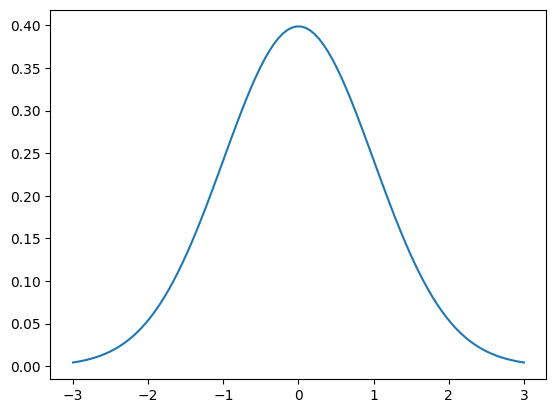

In [8]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [9]:
x =np.linspace(-99, 99, 100)
np.trapz(stats.norm.pdf(x, mu, sigma))

0.4928081193194616

In [10]:
-stats.norm.cdf(-0.8, mu, sigma)+stats.norm.cdf(0.8, mu, sigma)

0.5762892028332067

In [11]:
stats.norm.cdf(-2, mu, sigma)

0.022750131948179195

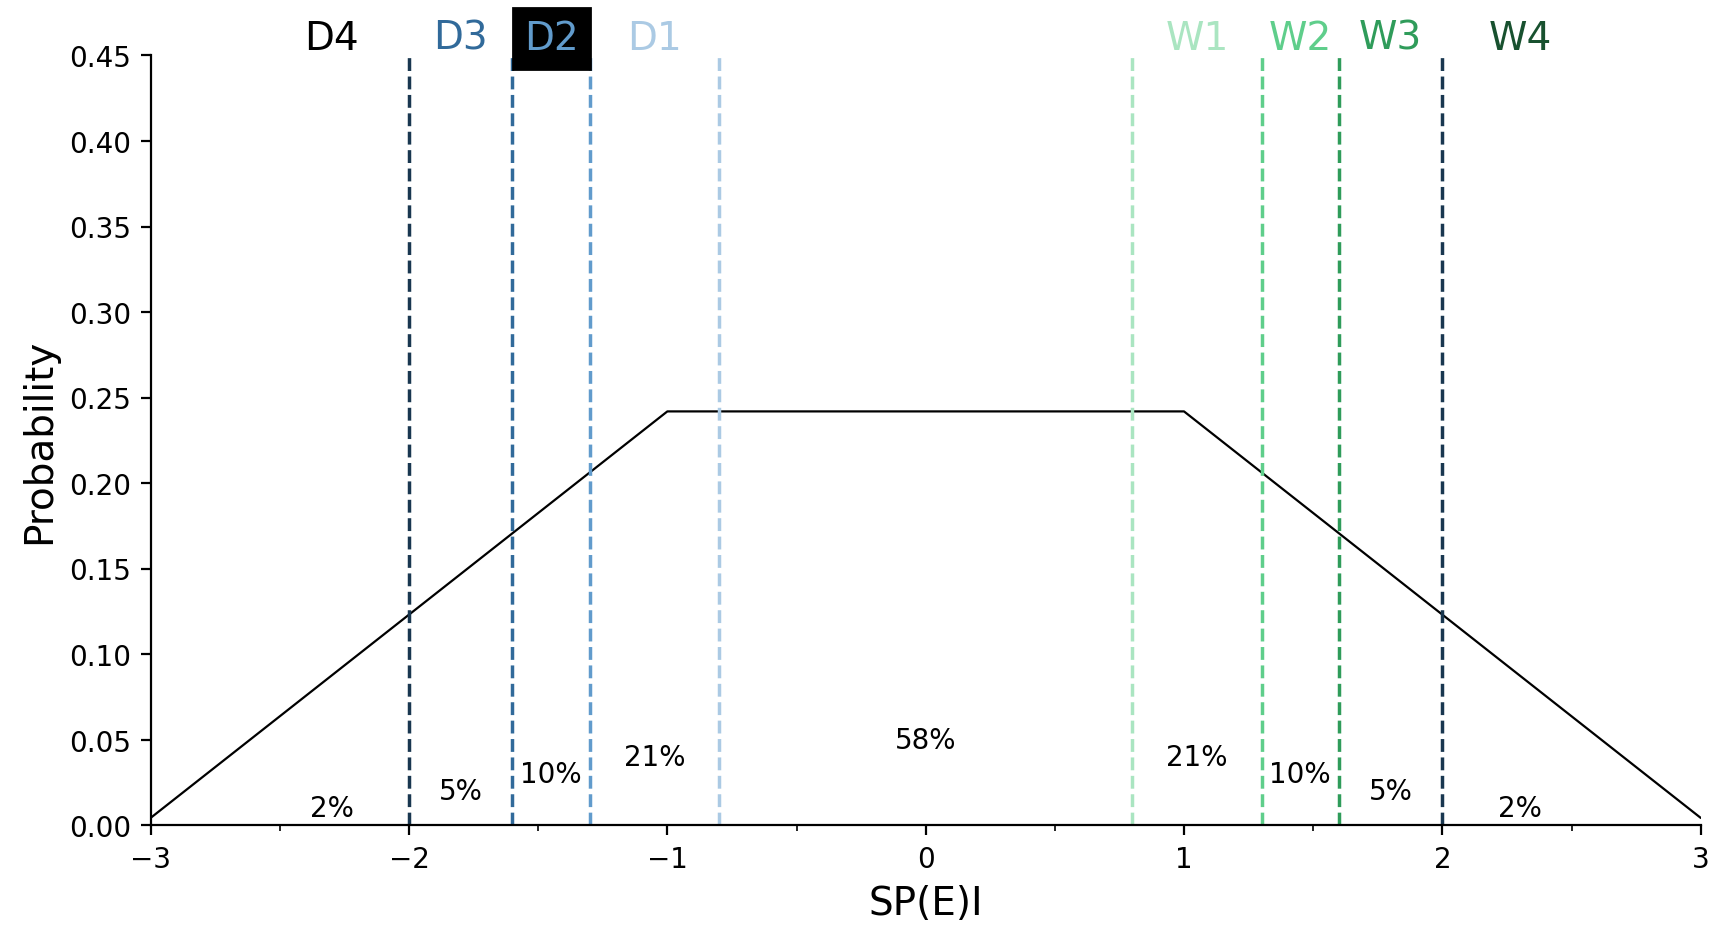

In [12]:
fig, ax = plt.subplots(figsize=(10,5),dpi = 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma),c='black',linewidth=0.8)

ax.axvline(x=-0.8, color='#abcae4', linestyle='--',linewidth=1.25)
ax.axvline(x=-1.3, color='#619bcc', linestyle='--',linewidth=1.25)
ax.axvline(x=-1.6, color='#316a9a', linestyle='--',linewidth=1.25)
ax.axvline(x=-2.0, color='#193750', linestyle='--',linewidth=1.25)
t_D1 = ax.text((-0.8-1.3)/2,0.46, 'D1', color='#abcae4',ha='center', va='center', fontsize=14)

ax.text((-1.6-1.3)/2,0.46, 'D2', color='#619bcc',ha='center', va='center', fontsize=14, backgroundcolor='black')
ax.text((-1.6-2.0)/2,0.46, 'D3', color='#316a9a',ha='center', va='center', fontsize=14)
ax.text(-2.3,0.46, 'D4', color='black',ha='center', va='center', fontsize=14)
ax.text((-0.8-1.3)/2,0.04, f'21%', color='black',ha='center', va='center', fontsize=10)
ax.text((-1.6-1.3)/2,0.03, f'10%', color='black',ha='center', va='center', fontsize=10)
ax.text((-1.6-2.0)/2,0.02, f'5%', color='black',ha='center', va='center', fontsize=10)
ax.text(-2.3,0.01, f'2%', color='black',ha='center', va='center', fontsize=10)

ax.axvline(x=0.8, color='#aae5c1', linestyle='--',linewidth=1.25)
ax.axvline(x=1.3, color='#5fce8b', linestyle='--',linewidth=1.25)
ax.axvline(x=1.6, color='#2f9c5a', linestyle='--',linewidth=1.25)
ax.axvline(x=2.0, color='#193750', linestyle='--',linewidth=1.25)
ax.text((0.8+1.3)/2,0.46, 'W1', color='#aae5c1',ha='center', va='center', fontsize=14)
ax.text((1.6+1.3)/2,0.46, 'W2', color='#5fce8b',ha='center', va='center', fontsize=14)
ax.text((1.6+2.0)/2,0.46, 'W3', color='#2f9c5a',ha='center', va='center', fontsize=14)
ax.text(+2.3,0.46, 'W4', color='#18512f',ha='center', va='center', fontsize=14)
ax.text((0.8+1.3)/2,0.04, f'21%', color='black',ha='center', va='center', fontsize=10)
ax.text((1.6+1.3)/2,0.03, f'10%', color='black',ha='center', va='center', fontsize=10)
ax.text((1.6+2.0)/2,0.02, f'5%', color='black',ha='center', va='center', fontsize=10)
ax.text(2.3,0.01, f'2%', color='black',ha='center', va='center', fontsize=10)

ax.text(0,0.05, f'58%', color='black',ha='center', va='center', fontsize=10)

ax.set_xlim(mu - 3*sigma,mu + 3*sigma)
ax.set_ylim(0,0.45)
ax.xaxis.set_major_locator(MultipleLocator(1))# defines setting of the small ticks
ax.xaxis.set_minor_locator(MultipleLocator(.5))# defines setting of the small ticks
ax.yaxis.set_major_locator(MultipleLocator(.05))# defines setting of the small ticks
ax.set_xlabel(r'SP(E)I',fontsize='14')
ax.set_ylabel(r'Probability',fontsize='14')
ax.tick_params(axis='both', which='major', labelsize='10')
ax.spines[['top', 'right']].set_visible(False)
#plt.grid(True,alpha=0.3,linestyle = 'dashed')

### Overview SA with updated IPCC regions

In [13]:
fn_tmin = '/rds/general/user/nmerz/home/MSc_Diss/data/AR6_regions/obs/era5/model_data/era5_tmin_daily_275-330E_15--60N_su.nc'
ds_tmin = xr.open_dataset(fn_tmin).sel(time=slice("1950","2023"))
era5_tmin = ds_tmin.tmin

sf_all = gpd.read_file("/rds/general/user/nmerz/home/MSc_Diss/data/AR6_regions/shapefile").to_crs(cartopy.crs.PlateCarree())
sf_SA = sf_all[sf_all['Acronym'].str.contains("NWS|NSA|NES|SAM|SWS|SES|SSA")]
rm_SA = regionmask.mask_3D_geopandas(sf_SA, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_9 = sf_all[sf_all['Acronym'].str.contains("NWS")]
rm_9 = regionmask.mask_3D_geopandas(sf_9, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_10 = sf_all[sf_all['Acronym'].str.contains("NSA")]
rm_10 = regionmask.mask_3D_geopandas(sf_10, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_11 = sf_all[sf_all['Acronym'].str.contains("NES")]
rm_11 = regionmask.mask_3D_geopandas(sf_11, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_12 = sf_all[sf_all['Acronym'].str.contains("SAM")]
rm_12 = regionmask.mask_3D_geopandas(sf_12, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_13 = sf_all[sf_all['Acronym'].str.contains("SWS")]
rm_13 = regionmask.mask_3D_geopandas(sf_13, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_14 = sf_all[sf_all['Acronym'].str.contains("SES")]
rm_14 = regionmask.mask_3D_geopandas(sf_14, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_15 = sf_all[sf_all['Acronym'].str.contains("SSA")]
rm_15 = regionmask.mask_3D_geopandas(sf_15, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)

sf_shp_arr = np.array([sf_9,sf_10,sf_11,sf_12,sf_13,sf_14,sf_15])
region_shp_arr = np.array([rm_9,rm_10,rm_11,rm_12,rm_13,rm_14,rm_15])

In [14]:
# Retriving the information from web
#stt = cartopy.feature.NaturalEarthFeature(category='cultural', 
#    name='admin_0_boundary_lines_land',
#    scale='10m',facecolor='none')
#stt_prv = cartopy.feature.NaturalEarthFeature(category='cultural', 
#    name='admin_1_states_provinces_lines',
#    scale='10m',facecolor='none')
fname = cartopy.io.shapereader.natural_earth(resolution='50m', category='cultural', name='urban_areas')
reader = cartopy.io.shapereader.Reader(fname)

land_fname = cartopy.io.shapereader.natural_earth(resolution='10m', category='physical', name='land')
land_reader = cartopy.io.shapereader.Reader(land_fname)

rivers_fname = cartopy.io.shapereader.natural_earth(resolution='50m', category='physical', name='rivers_lake_centerlines')
rivers_reader = cartopy.io.shapereader.Reader(rivers_fname)

<GeoAxes: >

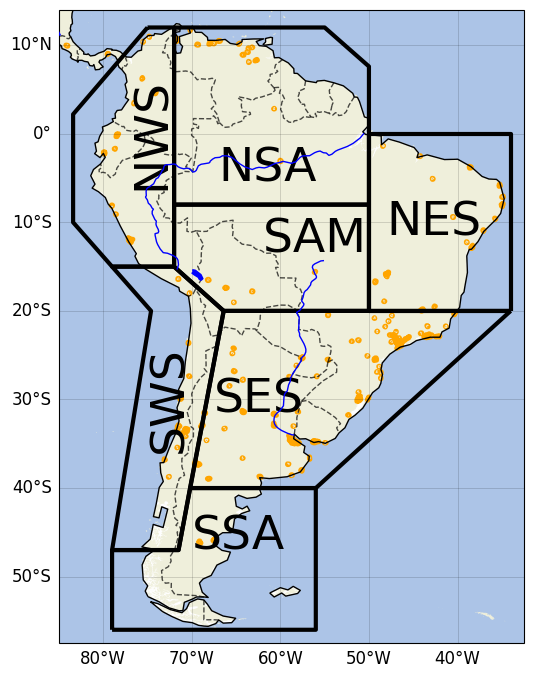

In [18]:
fig3, ax3 = plt.subplots(ncols = 1, nrows = 1, figsize = (6,10), dpi = 100, subplot_kw = {"projection" : cartopy.crs.PlateCarree()})

glt = ax3.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', alpha=0.2, draw_labels=True)
#glt.xlocator = plt.MultipleLocator(base=5.0)  # Draw gridlines at every 5th latitude
glt.xlabel_style = {'size': 12}  # Adjust the font size of x-axis labels
glt.ylabel_style = {'size': 12}  # Adjust the font size of y-axis labels

glt.top_labels = False
glt.right_labels = False
ax3.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.7, ls = "--", zorder = 99)
ax3.add_feature(cartopy.feature.OCEAN, alpha = 0.8)
ax3.add_feature(cartopy.feature.COASTLINE, lw = 1, zorder = 99)
ax3.add_feature(cartopy.feature.RIVERS, lw = 1, edgecolor='blue', zorder = 99)
ax3.add_feature(cartopy.feature.LAKES, lw = 1,facecolor='blue', edgecolor='blue', zorder = 99)
#ax3.add_feature(cartopy.feature.STATES, lw = 1, zorder = 99)

land = cartopy.feature.ShapelyFeature(land_reader.geometries(), cartopy.crs.PlateCarree(), facecolor=cartopy.feature.COLORS['land'])
ax3.add_feature(land)
urban_areas = cartopy.feature.ShapelyFeature(reader.geometries(), cartopy.crs.PlateCarree(), facecolor='orange', edgecolor='black')
ax3.add_feature(urban_areas, edgecolor='orange', lw = 3.5)
#rivers = cartopy.feature.ShapelyFeature(rivers_reader.geometries(), cartopy.crs.PlateCarree(), edgecolor='blue')
#ax3.add_feature(rivers, facecolor='None', edgecolor='blue',lw=0.5)

ax3.annotate('NWS',(-77,0),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center', rotation=90
            )
ax3.annotate('NSA',(-67,-4),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center'
            )
ax3.annotate('NES',(-48,-10),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center'
            )
ax3.annotate('SAM',(-62,-12),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center'
            )
ax3.annotate('SES',(-67.5,-30),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center'
            )
ax3.annotate('SWS',(-75,-30),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center', rotation=90
            )
ax3.annotate('SSA',(-70,-45.5),color='Black',fontsize=34,  xycoords='data',
            horizontalalignment='left', verticalalignment='center'
            )

ax3.set_xlim([-85,-32.5])
ax3.set_ylim([-57.5,14])
#title_str_DA = "Drought Atlast, Severity (={}) for return period = {} and duration = {}".format(np.round(sev_DA[0],3),DA_return_T,DA_duration)
#ax3.set_title(title_str_DA)
sf_SA.boundary.plot(ax = ax3, lw = 3, color = "black")

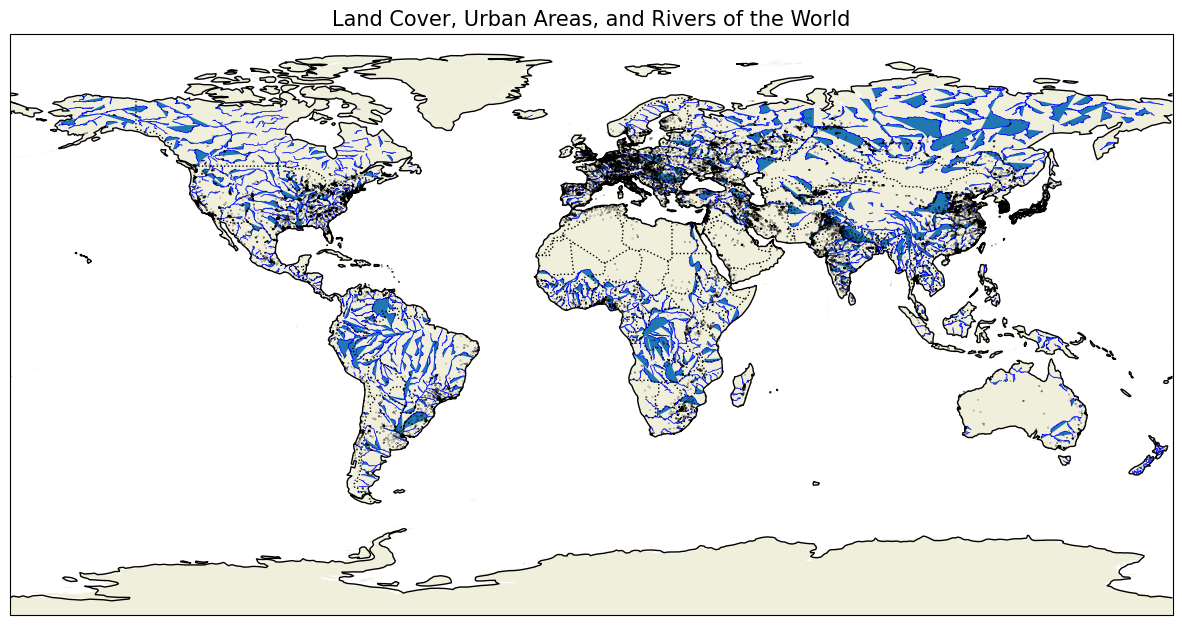

In [66]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

# Define file paths using natural_earth function for urban areas, land cover, and rivers
urban_areas_fname = shpreader.natural_earth(resolution='10m', category='cultural', name='urban_areas')
land_fname = shpreader.natural_earth(resolution='10m', category='physical', name='land')
rivers_fname = shpreader.natural_earth(resolution='10m', category='physical', name='rivers_lake_centerlines')

# Create reader objects for the shapefiles
urban_areas_reader = shpreader.Reader(urban_areas_fname)
land_reader = shpreader.Reader(land_fname)
rivers_reader = shpreader.Reader(rivers_fname)

# Create a figure and axis with a cartopy projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add a base map with different land cover colors
land = cfeature.ShapelyFeature(land_reader.geometries(), ccrs.PlateCarree(), facecolor=cfeature.COLORS['land'])
ocean = cfeature.ShapelyFeature([], ccrs.PlateCarree(), facecolor=cfeature.COLORS['water'])

ax.add_feature(ocean)
ax.add_feature(land)

# Add rivers to the map
rivers = cfeature.ShapelyFeature(rivers_reader.geometries(), ccrs.PlateCarree(), edgecolor='blue')
ax.add_feature(rivers, linewidth=0.5, edgecolor='blue')

# Add urban areas to the map
urban_areas = cfeature.ShapelyFeature(urban_areas_reader.geometries(), ccrs.PlateCarree(), facecolor='orange', edgecolor='black')
ax.add_feature(urban_areas)

# Add coastlines, borders, and other features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent of the map (optional, adjust as needed)
ax.set_extent([-180, 180, -90, 90])

# Add a title
ax.set_title('Land Cover, Urban Areas, and Rivers of the World', fontsize=15)

# Show the plot
plt.show()